<a href="https://colab.research.google.com/github/juliaxchen/Generating-Audio-Descriptions/blob/main/audio_description_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Check GPU
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'git-large-coco' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}

    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)





Loading caption model git-large-coco...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading CLIP model ViT-L-14/openai...


/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


Loaded CLIP model and data in 20.43 seconds.


In [ ]:
#@title Convert video to frames
import cv2
import os

vidcap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc.mp4")
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame_" + "0"*(8-len(str(count))) + str(count) + ".jpg", image)     # save frame as JPEG file
  os.chdir("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_docFrames")
  for i in range(4):
    success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 4

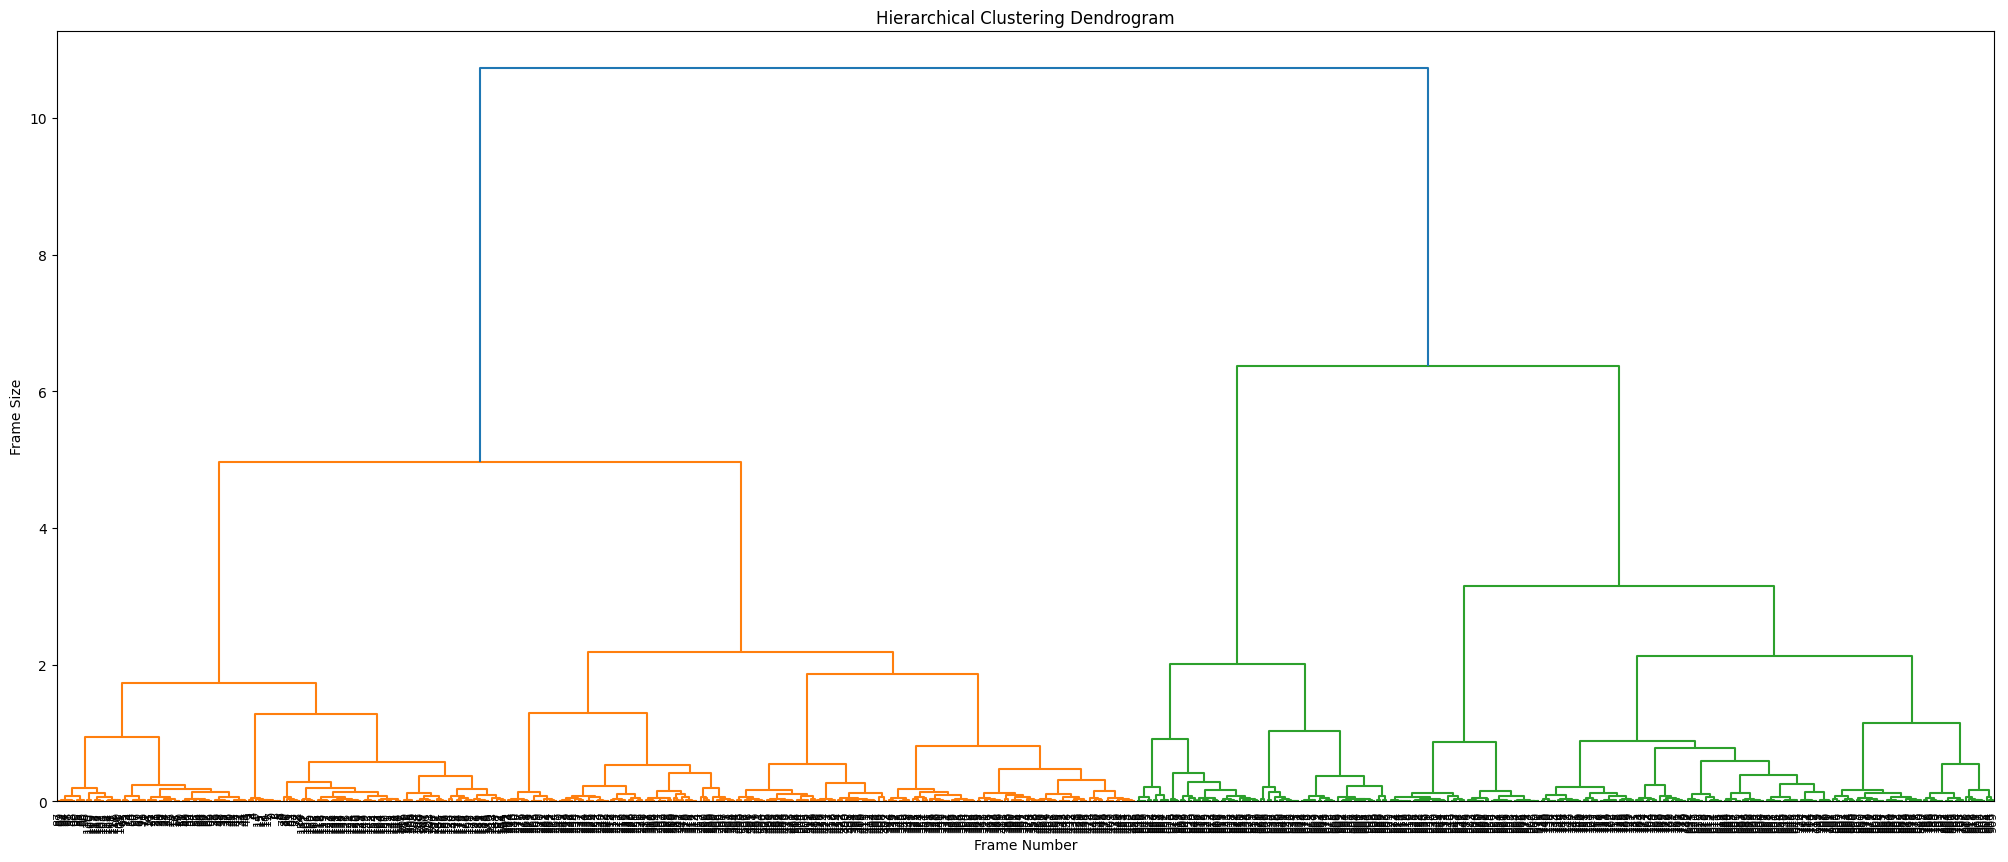

[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  3  3  3  3  3  3  3  3  3  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7

In [ ]:
#@title Hierarchical Clustering
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

path = "/content/drive/My Drive/Colab Notebooks/v2f_files/nature_docFrames/"

directory = os.fsencode(path[:-1])


img_szs = []
frame_nums = []

for idx, file in enumerate(os.listdir(directory)):
    filename = os.fsdecode(file)
    filepath = path + filename
    img_sz = os.stat(filepath).st_size
    img_szs.append(img_sz)
    frame_nums.append(int(filename[-12:-4]))

#creating data

normalized_img_szs = [(img_sz-min(img_szs))/(max(img_szs)-min(img_szs)) for img_sz in img_szs]
normalized_frame_nums = [(frame_num-min(frame_nums))/(max(frame_nums)-min(frame_nums))for frame_num in frame_nums]

X = np.array([[normalized_frame_nums[idx], val] for idx, val in enumerate(normalized_img_szs)])
y = np.array([0 for i in range(len(img_szs))])


#clustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, "ward")

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Frame Number')
plt.ylabel('Frame Size')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


#retrieve clusters

from scipy.cluster.hierarchy import fcluster
max_d = 1 #chose own cutoff value
clusters = fcluster(Z, max_d, criterion='distance')
print(clusters)


#X are the data points (but not the frames themselves, so you should edit this)
#labels are the labels

clusters = list(clusters)

chosen_frames = []

already_viewed = set()

for val in clusters:
  if val in already_viewed:
    continue
  else:
    images_in_cluster = []
    for idx, value in enumerate(clusters):
      if value == val:
        images_in_cluster.append(X[idx])
    midpoint = len(images_in_cluster)//2
    f_n = int(min(frame_nums) + images_in_cluster[midpoint][0]*(max(frame_nums)-min(frame_nums)))
    chosen_frames.append(f_n - (f_n % 4))
    already_viewed.add(val)

print(chosen_frames)

for frame in chosen_frames:
  filename = "frame_" + (8-len(str(frame)))*"0" + str(frame) + ".jpg"
  filepath = path + filename
  shutil.copy(filepath, "/content/drive/My Drive/Colab Notebooks/v2f_files/nature_docChosenFrames")

In [ ]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_docChosenFrames" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast","classic","negative"]
output_mode = 'desc.csv' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    #output descriptions
    descriptionFile = open("demofile2.txt", "a")
    descriptionFile.write(file + ": " + prompt)
    descriptionFile.close()

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")


Generating prompts:   0%|          | 0/14 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/clip_interrogator/clip_interrogator.py:200: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/clip_interrogator/clip_interrogator.py:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/usr/local/lib/python3.11/dist-packages/clip_interrogator/clip_interrogator.py:271: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/loca

KeyboardInterrupt: 

In [ ]:
# @title Create Subtitles For Each Frame

f = open("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_docChosenFrames/desc_using_git_large_coco.csv", "r")
f.readline()

tuple_lst = []
desc_ends = [] #frame number where each description ends

for line in f:
  tuple_lst.append((int(line[6:14]), line[line.index("\"") + 1 : 19 + line[19:].index(",")]))
tuple_lst.sort() #sorting descriptions by frame number
print(tuple_lst)

f.close()
last_frame_num = 0

with open("frameToDescription.csv", "w") as f2:
  f2.write("frame_num,sentence\n")
  for idx, tup in enumerate(tuple_lst):
    if idx == 0:
      clip_radius = tup[0]
    else:
      clip_radius = tup[0]-last_frame_num
    while last_frame_num <= tup[0] + clip_radius:
      f2.write(str(last_frame_num) + "," + tup[1]+ "\n") #writing the description for the corresponding frame number
      last_frame_num += 1
    desc_ends.append(last_frame_num)

print(desc_ends)

#adding subtitles to the video
import cv2
import pandas as pd
from moviepy.editor import VideoFileClip

def pipeline(frame):
    try:
        frame = frame.copy()  # Creates a modifiable copy
        text = str(next(dfi)[1]["sentence"])
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        thickness = 1
        text_color = (255, 255, 255)
        bg_color = (0, 0, 0)

        (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness) # Get text size
        x = int(frame.shape[1] * 0.05)  # 5% from the left
        y = int(frame.shape[0] * 0.9)  # 90% from the top
        cv2.rectangle(frame, (x - 5, y - text_height - 5), (x + text_width + 5, y + 5), bg_color, -1) # Draw filled rectangle as background
        cv2.putText(frame, text, (x, y), font, font_scale, text_color, thickness, cv2.LINE_AA) # Draw text on top
    except StopIteration:
        pass
    # additional frame manipulation
    return frame

dfi = pd.read_csv("frameToDescription.csv").iterrows()
video = VideoFileClip("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc.mp4")
#video.write_videofile("testing.mp4",fps=30)
print(video.fps)
out_video = video.fl_image(pipeline)
out_video.write_videofile("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_with_subtitles2.mp4", audio=True, fps=30)



[(36, 'the ocean is a big wave'), (248, 'storm in the ocean - high definition'), (644, 'a shark swimming in the ocean'), (1028, 'the ocean is a little rough but it is a lot of water.'), (1096, 'two ducks swimming in the ocean'), (1532, 'surfers in the ocean in the evening'), (1908, 'flying over the ocean in the morning'), (2200, 'a large body of water on a rocky beach.'), (2428, 'a close up of a penguin with red eyes'), (2544, 'a close up of a penguin with a yellow beak'), (2864, 'a seal swimming in the ocean'), (3212, 'penguins swimming in the ocean'), (3340, 'the water is turquoise and the waves are turquoise.'), (3524, 'the ocean waves crashing against the rocks')]
[73, 424, 865, 1192, 1192, 1873, 1944, 2457, 2457, 2632, 3097, 3328, 3353, 3696]
30.0
Moviepy - Building video /content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_with_subtitles2.mp4.
MoviePy - Writing audio in nature_doc_with_subtitles2TEMP_MPY_wvf_snd.mp3


chunk:   4%|▍         | 102/2710 [00:00<00:02, 974.07it/s, now=None]

KeyboardInterrupt: 

In [ ]:
# @title Text to Speech, Adding Audio to Video
!pip install gtts
!pip install pydub

from IPython.display import Audio
from gtts import gTTS
from pydub import AudioSegment
from pydub.playback import play
import librosa


descriptions = [tup[1] + "." for tup in tuple_lst]
audio_desc = AudioSegment.silent(duration=0)

for idx, frame_num in enumerate(desc_ends):
  current_desc = gTTS(descriptions[idx])
  current_desc.save("current_desc.mp3")
  Audio("current_desc.mp3")
  silent_audio_length = length if (length := ((frame_num/30) - librosa.get_duration(filename='current_desc.mp3') - ((len(audio_desc) / 1000)))) else 0


  # create silence audio segment
  silent_seg = AudioSegment.silent(duration=silent_audio_length*1000)  #duration in milliseconds
  timed_audio = AudioSegment.from_mp3("current_desc.mp3") + silent_seg
  audio_desc = audio_desc + timed_audio

audio_desc.export("audio_desc.mp3", format="mp3")




import moviepy.editor as mpe
my_clip = mpe.VideoFileClip("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_with_subtitles2.mp4")
audio_background = mpe.AudioFileClip('audio_desc.mp3')
final_audio = mpe.CompositeAudioClip([my_clip.audio, audio_background])
final_clip = my_clip.set_audio(final_audio)
final_clip.write_videofile("/content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_output_video.mp4", codec="libx264", audio_codec="aac")

	This alias will be removed in version 1.0.
  silent_audio_length = length if (length := ((frame_num/30) - librosa.get_duration(filename='current_desc.mp3') - ((len(audio_desc) / 1000)))) else 0

	This alias will be removed in version 1.0.
  silent_audio_length = length if (length := ((frame_num/30) - librosa.get_duration(filename='current_desc.mp3') - ((len(audio_desc) / 1000)))) else 0

	This alias will be removed in version 1.0.
  silent_audio_length = length if (length := ((frame_num/30) - librosa.get_duration(filename='current_desc.mp3') - ((len(audio_desc) / 1000)))) else 0

	This alias will be removed in version 1.0.
  silent_audio_length = length if (length := ((frame_num/30) - librosa.get_duration(filename='current_desc.mp3') - ((len(audio_desc) / 1000)))) else 0

	This alias will be removed in version 1.0.
  silent_audio_length = length if (length := ((frame_num/30) - librosa.get_duration(filename='current_desc.mp3') - ((len(audio_desc) / 1000)))) else 0

	This alias will be 

Moviepy - Building video /content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_output_video.mp4.
MoviePy - Writing audio in nature_doc_output_videoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_output_video.mp4



t: 100%|██████████| 3687/3687 [10:35<00:00,  6.66it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_with_subtitles2.mp4, 6220800 bytes wanted but 0 bytes read,at frame 3686/3687, at time 122.87/122.88 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Colab Notebooks/v2f_files/nature_doc_output_video.mp4
